In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


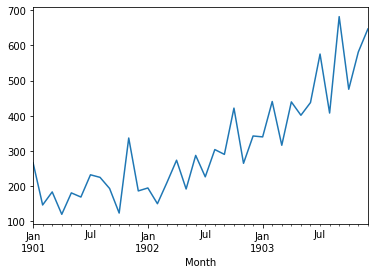

In [17]:
def parser(x):
    return pd.datetime.strptime('190'+x,'%Y-%m')

series = pd.read_csv('shampoo.csv',header=0,parse_dates=[0],index_col=0,squeeze=True,date_parser=parser)
print(series.head())
series.plot()
plt.show()

In [27]:
series.dtype

dtype('float64')

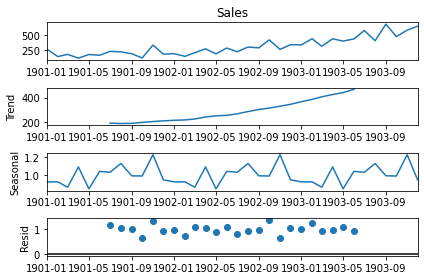

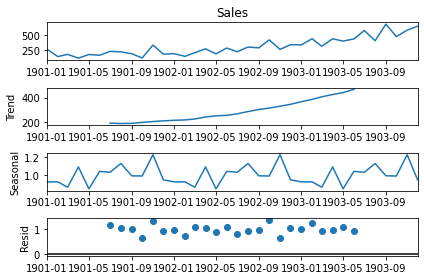

In [28]:
result = seasonal_decompose(series,model ='multiplicative')
result.plot()

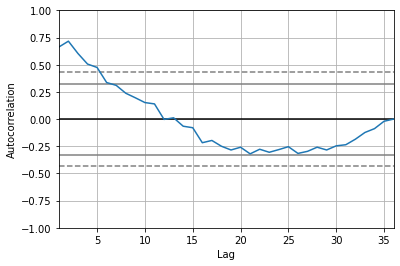

In [7]:
pd.plotting.autocorrelation_plot(series)
plt.show()

In [10]:
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

/home/codexharsh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/codexharsh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 02 Nov 2020   AIC                            406.340
Time:                        06:35:28   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-

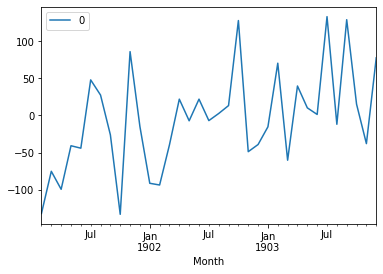

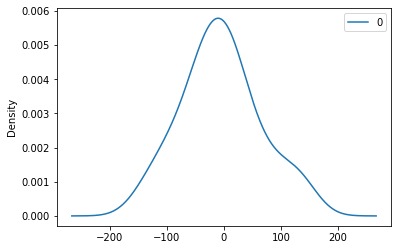

                0
count   35.000000
mean    -5.495277
std     68.132878
min   -133.296669
25%    -42.477966
50%     -7.186649
75%     24.748283
max    133.237929


In [11]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [44]:
train = series.iloc[:len(series)-12] 
test = series.iloc[len(series)-12:]

In [47]:
model_train = ARIMA(series,order=(5,1,0))
model_train_result = model_train.fit()
model_train_result.summary()

/home/codexharsh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/codexharsh/.local/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Mon, 02 Nov 2020   AIC                            406.340
Time:                        08:43:19   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     -2.203      0.028      -1.172      -0.068
ar.L3.D.Sales    -0.3606      0.295     -1.222      0.222      -0.939       0.218
ar.L4.D.Sales    -0.1252      0.280     -0.447      0.655      -0.674       0.424
ar.L5.D.Sales     0.1289      0.191      0.673      0.501      -0.246       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0617           -0.5064j            1.1763           -0.4292
AR.2           -1.0617           +0.5064j            1.1763            0.4292
AR.3            0.0816           -1.3804j            1.3828           -0.2406
AR.4            0.0816           +1.3804j            1.3828            0.2406
AR.5            2.9315           -0.0000j            2.9315           -0.0000
-----------------------------------------------------------------------------
"""

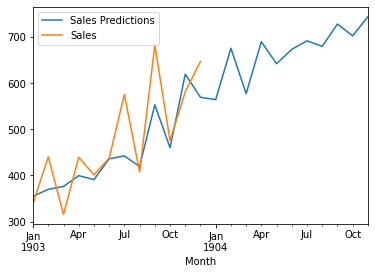

In [51]:
start = len(train)
end = len(train)+len(test) + 10

predictions = model_train_result.predict(start,end,typ = 'levels').rename("Sales Predictions")

predictions.plot(legend=True)
test.plot(legend = True)
plt.savefig('ts_shampoo.png',dpi=300,bbox_inches = 'tight')